# Libs

In [62]:
import pandas as pd
import numpy as np


# Overview

In [63]:
df = pd.read_csv('../data/processed/students_longitudinal.csv')
df.head()

,ano,ano_ingresso,avaliador4,cf,cg,ct,defasagem,destaque_ida,destaque_ieg,destaque_ipv,...,ieg,inde,instituição_de_ensino,ips,ipv,nº_av,pedra,ra,rec_psicologia,turma
0,2022,2016,Avaliador-31,18.0,"753,000",10.0,-1,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Integrar-se mais aos Princípios Pass...,...,"4,1","5,783",Escola Pública,"5,6","7,278",4.0,Ametista,RA-1,Requer avaliação,A
1,2022,2017,Avaliador-31,8.0,"469,000",3.0,0,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Integrar-se mais aos Princípios Pass...,...,"5,2","7,055",Rede Decisão,"6,3","6,778",4.0,Ametista,RA-2,Sem limitações,A
2,2022,2016,Avaliador-31,13.0,"629,000",6.0,0,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa entrega das lições de casa.,Destaque: A sua boa integração aos Princípios ...,...,"7,9","6,591",Rede Decisão,"5,6","7,556",4.0,Ametista,RA-3,Sem limitações,A
3,2022,2017,Avaliador-31,15.0,"731,000",7.0,0,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Integrar-se mais aos Princípios Pass...,...,"4,5","5,951",Rede Decisão,"5,6","5,278",4.0,Ametista,RA-4,Requer avaliação,A
4,2022,2016,Avaliador-31,6.0,"344,000",2.0,0,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa entrega das lições de casa.,Melhorar: Integrar-se mais aos Princípios Pass...,...,"8,6","7,427",Rede Decisão,"5,6","7,389",4.0,Ametista,RA-5,Requer avaliação,A


In [64]:
df.shape

(3030, 26)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ano                    3030 non-null   int64  
 1   ano_ingresso           3030 non-null   int64  
 2   avaliador4             1051 non-null   object 
 3   cf                     860 non-null    float64
 4   cg                     860 non-null    object 
 5   ct                     860 non-null    float64
 6   defasagem              3030 non-null   int64  
 7   destaque_ida           860 non-null    object 
 8   destaque_ieg           860 non-null    object 
 9   destaque_ipv           860 non-null    object 
 10  fase                   898 non-null    float64
 11  fase_ideal             3030 non-null   object 
 12  gênero                 3030 non-null   object 
 13  iaa                    2865 non-null   object 
 14  ian                    3030 non-null   object 
 15  ida 

In [66]:
df.describe()

,ano,ano_ingresso,cf,ct,defasagem,fase,nº_av
count,3030.00000,3030.000000,860.000000,860.000000,3030.000000,898.000000,2954.000000
mean,2023.09769,2021.563696,75.519767,6.598837,-0.642904,2.390869,3.031821
std,0.80995,1.822171,52.312670,3.975858,0.866382,2.235271,1.063670
min,2022.00000,2016.000000,1.000000,1.000000,-5.000000,0.000000,0.000000
25%,2022.00000,2021.000000,30.000000,3.000000,-1.000000,1.000000,2.000000
50%,2023.00000,2022.000000,67.000000,6.000000,-1.000000,2.000000,3.000000
75%,2024.00000,2023.000000,118.000000,9.000000,0.000000,3.000000,4.000000
max,2024.00000,2024.000000,192.000000,18.000000,3.000000,9.000000,6.000000


## Temporal dimension

In [67]:
df['ano'].value_counts().sort_index()

ano
2022     860
2023    1014
2024    1156
Name: count, dtype: int64

## Missing values

In [68]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .to_frame('missing_ratio')
)

missing


,missing_ratio
cg,0.716172
cf,0.716172
destaque_ipv,0.716172
destaque_ieg,0.716172
ct,0.716172
destaque_ida,0.716172
rec_psicologia,0.716172
fase,0.703630
avaliador4,0.653135
ipv,0.058746


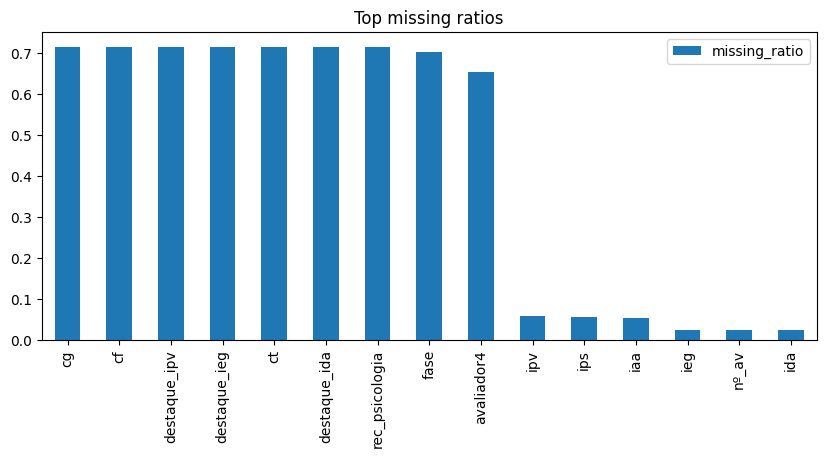

In [69]:
import matplotlib.pyplot as plt

missing.head(15).plot(kind='bar', figsize=(10,4))
plt.title('Top missing ratios')
plt.show()


In [70]:
[['ipv', 'ips', 'iaa', 'ieg', 'nº_av', 'ida','Defasagem']]

[['ipv', 'ips', 'iaa', 'ieg', 'nº_av', 'ida', 'Defasagem']]

## Duplicates

In [71]:
df.duplicated().sum()


np.int64(0)

# Data Types

In [72]:
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

numeric_cols, categorical_cols


(Index(['ano', 'ano_ingresso', 'cf', 'ct', 'defasagem', 'fase', 'nº_av'], dtype='object'),
 Index(['avaliador4', 'cg', 'destaque_ida', 'destaque_ieg', 'destaque_ipv',
        'fase_ideal', 'gênero', 'iaa', 'ian', 'ida', 'ieg', 'inde',
        'instituição_de_ensino', 'ips', 'ipv', 'pedra', 'ra', 'rec_psicologia',
        'turma'],
       dtype='object'))

In [73]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ano,3030.0,2023.097690,0.809950,2022.0,2022.0,2023.0,2024.0,2024.0
ano_ingresso,3030.0,2021.563696,1.822171,2016.0,2021.0,2022.0,2023.0,2024.0
cf,860.0,75.519767,52.312670,1.0,30.0,67.0,118.0,192.0
ct,860.0,6.598837,3.975858,1.0,3.0,6.0,9.0,18.0
defasagem,3030.0,-0.642904,0.866382,-5.0,-1.0,-1.0,0.0,3.0
fase,898.0,2.390869,2.235271,0.0,1.0,2.0,3.0,9.0
nº_av,2954.0,3.031821,1.063670,0.0,2.0,3.0,4.0,6.0


## Categorical freq

In [74]:
for col in categorical_cols:
    print(f'\n{col}')
    display(df[col].value_counts(normalize=True).head(5))



avaliador4


avaliador4
Avaliador-8     0.317793
Avaliador-31    0.294957
Avaliador-5     0.089439
Avaliador-26    0.072312
Avaliador-2     0.067555
Name: proportion, dtype: float64


cg


cg
753,000    0.001163
469,000    0.001163
629,000    0.001163
731,000    0.001163
344,000    0.001163
Name: proportion, dtype: float64


destaque_ida


destaque_ida
Melhorar: Empenhar-se mais nas aulas e avaliações.    0.722093
Destaque: As suas boas notas na Passos Mágicos.       0.277907
Name: proportion, dtype: float64


destaque_ieg


destaque_ieg
Destaque: A sua boa entrega das lições de casa.        0.67093
Melhorar: Melhorar a sua entrega de lições de casa.    0.32907
Name: proportion, dtype: float64


destaque_ipv


destaque_ipv
Melhorar: Integrar-se mais aos Princípios Passos Mágicos.        0.561628
Destaque: A sua boa integração aos Princípios Passos Mágicos.    0.438372
Name: proportion, dtype: float64


fase_ideal


fase_ideal
Fase 2 (5° e 6° ano)    0.173927
Fase 3 (7° e 8° ano)    0.144224
Fase 1 (3° e 4° ano)    0.095710
Fase 2 (5º e 6º ano)    0.071947
Fase 3 (7º e 8º ano)    0.068317
Name: proportion, dtype: float64


gênero


gênero
Feminino     0.385809
Masculino    0.330363
Menina       0.150825
Menino       0.133003
Name: proportion, dtype: float64


iaa


iaa
9,0     0.122513
9,5     0.116928
10,0    0.112740
0,0     0.086911
8,5     0.083770
Name: proportion, dtype: float64


ian


ian
10        0.357756
5         0.352805
5,000     0.189109
10,000    0.085479
2,500     0.009241
Name: proportion, dtype: float64


ida


ida
#DIV/0!    0.034529
7,3        0.033514
7,5        0.032160
6,8        0.031144
6,5        0.029452
Name: proportion, dtype: float64


ieg


ieg
10,0    0.062627
9,5     0.045362
9,3     0.039946
9,8     0.037915
9,0     0.035545
Name: proportion, dtype: float64


inde


inde
#DIV/0!    0.021491
INCLUIR    0.012760
6,996      0.001007
7,619      0.001007
7,665      0.001007
Name: proportion, dtype: float64


instituição_de_ensino


instituição_de_ensino
Pública                                 0.568504
Escola Pública                          0.248267
Privada - Programa de Apadrinhamento    0.064048
Rede Decisão                            0.034995
Privada                                 0.034335
Name: proportion, dtype: float64


ips


ips
7,5     0.360266
7,52    0.100735
2,52    0.090241
6,3     0.075201
5,6     0.061560
Name: proportion, dtype: float64


ipv


ipv
7,5      0.036466
7,500    0.018233
7,8      0.017181
7,9      0.016480
8,3      0.015778
Name: proportion, dtype: float64


pedra


pedra
Ametista    0.403291
Topázio     0.240766
Agata       0.158160
Quartzo     0.090665
Ágata       0.072868
Name: proportion, dtype: float64


ra


ra
RA-860    0.00099
RA-859    0.00099
RA-858    0.00099
RA-855    0.00099
RA-854    0.00099
Name: proportion, dtype: float64


rec_psicologia


rec_psicologia
Não atendido        0.472093
Sem limitações      0.295349
Requer avaliação    0.183721
Não indicado        0.043023
Não avaliado        0.005814
Name: proportion, dtype: float64


turma


turma
A    0.035314
B    0.025743
L    0.025083
F    0.023102
K    0.020462
Name: proportion, dtype: float64

In [75]:
df['defasagem'].value_counts(normalize=True)


defasagem
-1    0.415512
 0    0.380198
-2    0.126403
 1    0.054455
-3    0.012871
 2    0.007921
-4    0.001650
 3    0.000660
-5    0.000330
Name: proportion, dtype: float64

In [76]:
corr = df[numeric_cols].corr()['defasagem'].sort_values(ascending=False)
corr


defasagem       1.000000
fase            0.279587
ano             0.248550
ano_ingresso    0.018629
nº_av          -0.103518
ct             -0.298603
cf             -0.363057
Name: defasagem, dtype: float64

In [77]:
from scipy.stats import zscore

z = df[numeric_cols].apply(zscore)

(z.abs() > 3).mean().sort_values(ascending=False)


ano_ingresso    0.017492
defasagem       0.010561
ano             0.000000
cf              0.000000
ct              0.000000
fase            0.000000
nº_av           0.000000
dtype: float64

In [78]:
df.groupby('ano')['defasagem'].mean()


ano
2022   -0.943023
2023   -0.654832
2024   -0.409170
Name: defasagem, dtype: float64

In [79]:
df.columns

Index(['ano', 'ano_ingresso', 'avaliador4', 'cf', 'cg', 'ct', 'defasagem',
       'destaque_ida', 'destaque_ieg', 'destaque_ipv', 'fase', 'fase_ideal',
       'gênero', 'iaa', 'ian', 'ida', 'ieg', 'inde', 'instituição_de_ensino',
       'ips', 'ipv', 'nº_av', 'pedra', 'ra', 'rec_psicologia', 'turma'],
      dtype='object')

In [80]:
df['nº_av'].unique()

array([ 4.,  3.,  2., nan,  5.,  6.,  0.])

In [82]:
df_2 = df[['ipv', 'ips', 'iaa', 'ieg', 'nº_av', 'ida','defasagem']].dropna()
df_2.head()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem
0,"7,278","5,6","8,3","4,1",4.0,"4,0",-1
1,"6,778","6,3","8,8","5,2",4.0,"6,8",0
2,"7,556","5,6","0,0","7,9",4.0,"5,6",0
3,"5,278","5,6","8,8","4,5",4.0,"5,0",0
4,"7,389","5,6","7,9","8,6",4.0,"5,2",0


In [83]:
df_2.head()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem
0,"7,278","5,6","8,3","4,1",4.0,"4,0",-1
1,"6,778","6,3","8,8","5,2",4.0,"6,8",0
2,"7,556","5,6","0,0","7,9",4.0,"5,6",0
3,"5,278","5,6","8,8","4,5",4.0,"5,0",0
4,"7,389","5,6","7,9","8,6",4.0,"5,2",0


In [84]:
df_2.describe()

,nº_av,defasagem
count,2846.000000,2846.000000
mean,3.138440,-0.699578
std,0.911835,0.849716
min,0.000000,-5.000000
25%,2.000000,-1.000000
50%,3.000000,-1.000000
75%,4.000000,0.000000
max,6.000000,3.000000


In [85]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2846 entries, 0 to 2927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipv        2846 non-null   object 
 1   ips        2846 non-null   object 
 2   iaa        2846 non-null   object 
 3   ieg        2846 non-null   object 
 4   nº_av      2846 non-null   float64
 5   ida        2846 non-null   object 
 6   defasagem  2846 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 177.9+ KB


In [86]:
df_2['ipv'].unique()

array(['7,278', '6,778', '7,556', '5,278', '7,389', '7,222', '7,667',
       '6,278', '9,500', '7,056', '6,389', '8,056', '7,750', '7,292',
       '6,333', '8,292', '6,875', '7,000', '7,167', '7,250', '8,833',
       '8,556', '9,111', '9,667', '10,000', '7,611', '7,333', '7,944',
       '6,000', '8,944', '5,222', '9,833', '6,111', '4,375', '6,083',
       '5,958', '7,417', '7,083', '7,042', '8,500', '7,542', '6,500',
       '7,500', '6,458', '6,125', '8,250', '7,875', '8,125', '7,917',
       '6,167', '9,417', '5,917', '6,889', '5,833', '8,667', '4,625',
       '9,292', '8,000', '7,625', '7,458', '6,417', '6,750', '8,458',
       '9,208', '9,750', '7,125', '6,667', '9,083', '9,583', '6,292',
       '6,833', '7,708', '6,708', '8,375', '3,792', '5,000', '5,583',
       '7,792', '6,958', '4,958', '7,375', '8,583', '6,375', '3,917',
       '7,583', '8,208', '7,958', '8,083', '6,542', '7,208', '7,833',
       '4,792', '5,792', '8,917', '9,250', '6,042', '8,042', '8,625',
       '4,708', '3,

In [87]:
df_2['ips'].unique()

array(['5,6', '6,3', '7,5', '5,0', '6,9', '8,1', '8,8', '10,0', '9,4',
       '4,4', '3,8', '2,5', '8,13', '8,14', '3,14', '7,52', '8,76',
       '3,76', '2,52', '6,89', '4,39', '6,26', '3,77', '9,38', '5,02',
       '5,63', '6,27', '4,38', '10', '5,64', '5', '7,51', '5,01', '3,1',
       '7,2', '6,6', '5,9'], dtype=object)

In [88]:
df_2['iaa'].unique()

array(['8,3', '8,8', '0,0', '7,9', '7,1', '9,2', '6,3', '9,6', '10,0',
       '5,0', '6,7', '7,5', '5,8', '5,4', '4,6', '9,5', '8,5', '7,4',
       '9,0', '8,0', '6,9', '7,0', '6,4', '6,8', '8,4', '3,5', '7,8',
       '8,9', '7,3', '5,2', '5,3', '4,1', '5,7', '4,0', '5,1', '4,7',
       '1,7', '6,2'], dtype=object)

In [89]:
df_2['ieg'].unique()

array(['4,1', '5,2', '7,9', '4,5', '8,6', '8,4', '4,6', '9,5', '4,2',
       '4,0', '7,4', '8,3', '10,0', '8,7', '9,2', '8,2', '8,8', '7,6',
       '6,1', '6,4', '4,8', '9,6', '9,0', '5,4', '8,9', '7,8', '6,5',
       '5,9', '6,3', '7,0', '6,9', '8,1', '9,3', '6,0', '9,4', '9,1',
       '7,7', '5,6', '3,0', '6,6', '2,0', '7,5', '3,3', '3,8', '2,7',
       '6,8', '7,3', '9,7', '5,7', '7,1', '8,0', '0,0', '5,3', '3,4',
       '8,5', '5,8', '6,2', '4,7', '3,5', '9,9', '9,8', '7,2', '5,1',
       '3,6', '4,3', '6,7', '4,9', '3,7', '2,8', '2,9', '3,9', '5,0',
       '5,5', '4,4', '3,1', '3,2', '2,5'], dtype=object)

In [90]:
df_2['ida'].unique()

array(['4,0', '6,8', '5,6', '5,0', '5,2', '3,3', '7,6', '1,6', '6,7',
       '4,1', '3,0', '1,5', '4,7', '7,3', '3,5', '7,8', '9,0', '8,0',
       '3,8', '8,6', '6,9', '3,7', '7,5', '6,1', '4,8', '8,5', '5,9',
       '4,3', '2,1', '8,1', '3,9', '6,2', '7,0', '8,4', '7,2', '4,9',
       '5,8', '9,3', '8,7', '4,5', '3,6', '2,5', '2,9', '1,2', '2,0',
       '0,0', '0,7', '8,9', '7,1', '6,0', '5,5', '8,8', '6,5', '6,6',
       '7,4', '7,7', '5,7', '4,6', '5,3', '5,4', '1,8', '4,4', '7,9',
       '1,4', '6,3', '8,3', '3,2', '2,7', '5,1', '2,8', '3,4', '3,1',
       '2,6', '8,2', '0,9', '1,3', '9,1', '1,1', '1,7', '2,3', '6,4',
       '9,5', '9,8', '2,4', '9,6', '9,2', '9,9', '4,2', '1,9', '9,4',
       '1,0', '9,7', '#DIV/0!', '10,0', '2,2', '0,5'], dtype=object)

In [91]:
df_2["ipv"] = (
    df["ipv"]
    .str.replace(",", ".", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)

df_2["ips"] = (
    df["ips"]
    .str.replace(",", ".", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)

df_2["iaa"] = (
    df["iaa"]
    .str.replace(",", ".", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)

df_2["ieg"] = (
    df["ieg"]
    .str.replace(",", ".", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)

df_2["ida"] = (
    df["ida"]
    .str.replace(",", ".", regex=False)
    .pipe(pd.to_numeric, errors="coerce")
)


In [92]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2846 entries, 0 to 2927
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ipv        2846 non-null   float64
 1   ips        2846 non-null   float64
 2   iaa        2846 non-null   float64
 3   ieg        2846 non-null   float64
 4   nº_av      2846 non-null   float64
 5   ida        2845 non-null   float64
 6   defasagem  2846 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 177.9 KB


In [93]:
df_2.describe()

,ipv,ips,iaa,ieg,nº_av,ida,defasagem
count,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2845.000000,2846.000000
mean,7.545494,6.296954,7.925053,8.228602,3.138440,6.381687,-0.699578
std,1.085953,1.784210,2.622150,1.568599,0.911835,1.958188,0.849716
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,-5.000000
25%,7.000000,5.020000,7.900000,7.500000,2.000000,5.100000,-1.000000
50%,7.587500,7.500000,8.800000,8.650000,3.000000,6.700000,-1.000000
75%,8.272250,7.500000,9.500000,9.400000,4.000000,7.800000,0.000000
max,10.010000,10.000000,10.000000,10.000000,6.000000,10.000000,3.000000


In [94]:
df_2['defasagem'].unique()

array([-1,  0, -2, -3,  2,  1, -4, -5,  3])

In [96]:
df_2['defasagem'].value_counts()

defasagem
-1    1254
 0    1024
-2     382
 1     120
-3      38
 2      20
-4       5
 3       2
-5       1
Name: count, dtype: int64